### Auditory Oddball ERP analysis: data visualisation
An example of visualising auditory oddball data within multiple timepoints (or groups) at one channel.

In [12]:
# Import packages
import mne, os
import matplotlib.pyplot as plt

# Set the default directory
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')
mne.set_log_level('error')

# Import functions
from basic.arrange_data import read_files

Define these variables!

In [13]:
# Folder where to get the clean epochs files
clean_folder = r"Data/Clean/OKTOS"

# Folder where to save the plots
results_foldername = r"Results/OKTOS"

# Sub-folders for experiments (i.e. timepoints or groups) and their acronyms
exp_folders = [r"Auditory Oddball/Baseline",
               r"Auditory Oddball/6 weeks",
               r"Auditory Oddball/10 weeks"]
exp_legend = ['PRE', 'POST', 'FUP']

# Export the figure to results folder or not
savefig = False

# Subjects which to not plot
exclude_subjects = ['OKTOS_0019', 'OKTOS_0024', 'OKTOS_0033']

# Channel of interest
channel_pick = 'Cz'

# Event names (i.e. different stimuli) within the epochs
event_list = ['target after 1 standard', 'target after 3 standards', 'target after 5 standards',
              'target after 7 standards', 'target after 9 standards', 'target after 11 standards']

Run this to generate the plots.

EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0019_00A_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0024 in OKTOS_0024_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0024_00A_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0033 in OKTOS_0033_00A_AO at Data/Clean/OKTOS/Auditory Oddball/Baseline/OKTOS_0033_00A_AO_clean-epo.fif
Files in Data/Clean/OKTOS/Auditory Oddball/Baseline read in: 24
EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0019_06D_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0024 in OKTOS_0024_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0024_06D_AO_clean-epo.fif
EXCLUDED SUBJECT:  OKTOS_0033 in OKTOS_0033_06D_AO at Data/Clean/OKTOS/Auditory Oddball/6 weeks/OKTOS_0033_06D_AO_clean-epo.fif
Files in Data/Clean/OKTOS/Auditory Oddball/6 weeks read in: 24
EXCLUDED SUBJECT:  OKTOS_0019 in OKTOS_0019_07A_AO at Data/Clean/OKTOS/Auditory Oddball/10 weeks/OKTOS

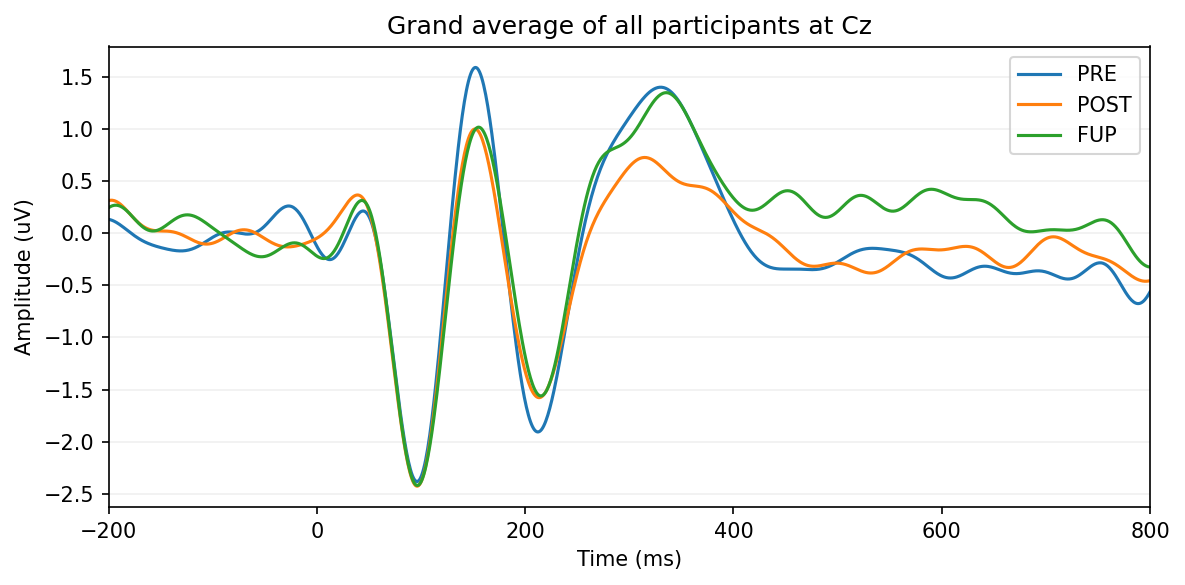

In [14]:
# Loop through each experiment folder
master_grand_evoked_data = [None]*len(exp_folders)
master_grand_evoked_times = [None]*len(exp_folders)
for e, exp_folder in enumerate(exp_folders):
    # Get directories of clean EEG files and exclude the pre-defined subjects
    dir_inprogress = os.path.join(clean_folder, exp_folder)
    file_dirs, subject_names = read_files(dir_inprogress, "_clean-epo.fif", exclude_subjects=exclude_subjects)

    # Loop through all the subjects' directories (EEG files directories)
    evoked_signal = [None]*len(file_dirs)
    for i in range(len(file_dirs)):
        # Read the clean data from the disk
        epochs = mne.read_epochs(fname='{}/{}_clean-epo.fif'.format(dir_inprogress, subject_names[i]), verbose=False)
        
        # Create an averaged evoked object from epochs
        evoked_signal[i] = epochs[event_list].average(picks=channel_pick)

    # Average all the averaged evoked objects, thereby creating a grand average signals
    master_grand_evoked_data[e] = mne.grand_average(evoked_signal).data[0]*1e6
    master_grand_evoked_times[e] = mne.grand_average(evoked_signal).times*1e3

# Plot all experiments' grand average signals on a single plot
fig, ax = plt.subplots(figsize=(8, 4), layout='tight', dpi=150)
for ix in range(len(master_grand_evoked_times)):
    ax.plot(master_grand_evoked_times[ix], master_grand_evoked_data[ix], linewidth=1.5)
ax.legend(exp_legend)
ax.set_title('Grand average of all participants at {}'.format(channel_pick))
plt.xlim([-200, 800])
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (uV)')
plt.grid(which='major', axis='y', linewidth = 0.15)
if savefig == True:
    plt.savefig(fname='{}/GRAND_erpfig_{}.png'.format(results_foldername, channel_pick), dpi=300)
plt.show()
